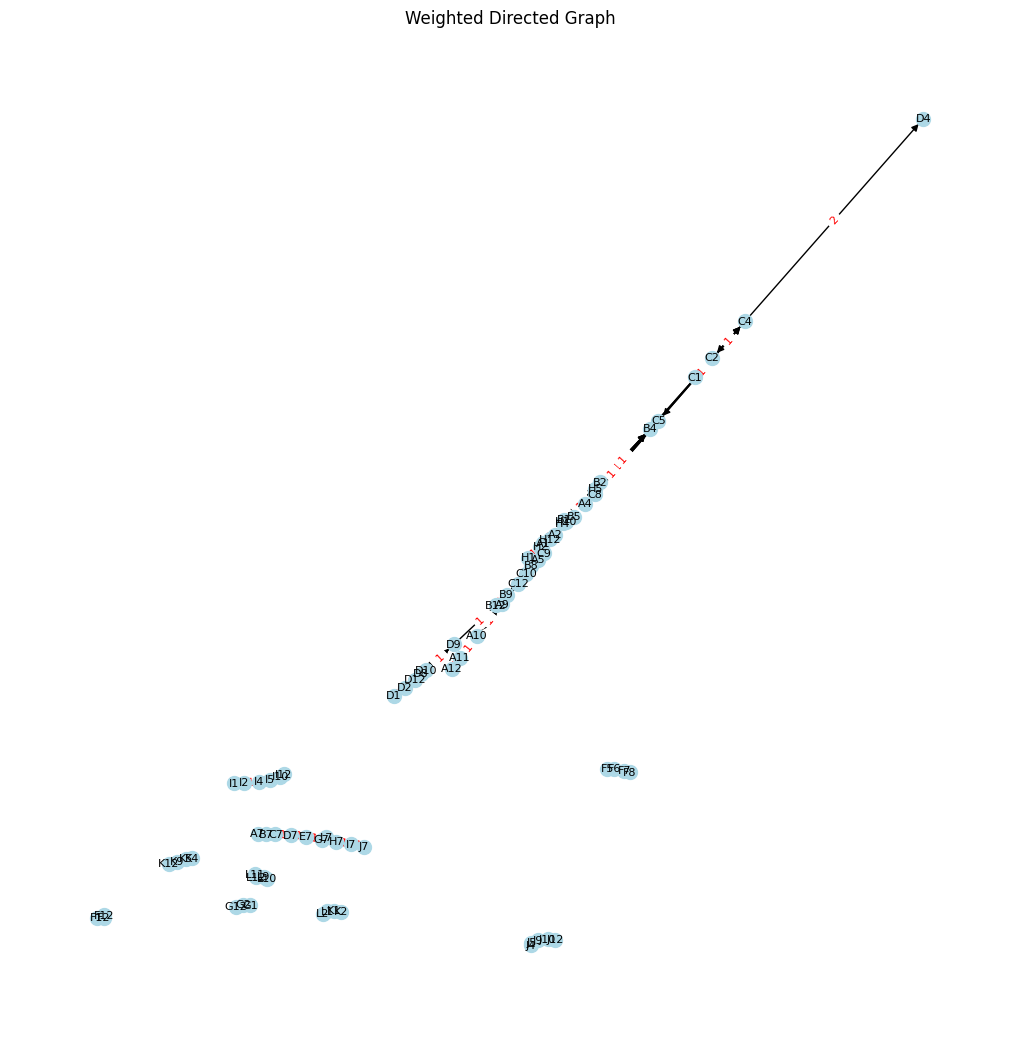

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt


graph = {
    # Gray cells
    'A1': {'A2': 1, 'B1': 1},
    'A2': {'A1': 1, 'A4': 1},
    'A4': {'A2': 1, 'A5': 1, 'B4': 1},
    'A5': {'A4': 1, 'A9': 1},
    'A9': {'A5': 1, 'A10': 1},
    'A10': {'A9': 1, 'A11': 1},
    'A11': {'A10': 1, 'A12': 1},
    'A12': {'A11': 1},
    'B1': {'A1': 1, 'B2': 1},
    'B2': {'B1': 1, 'B4': 1},
    'B4': {'A4': 1, 'B2': 1, 'B5': 1, 'C4': 2},
    'B5': {'A5': 1, 'B4': 1, 'B8': 1},
    'B8': {'B5': 1, 'B9': 1},
    'B9': {'A9': 1, 'B8': 1, 'B12': 1},
    'B12': {'B9': 1},
    'C1': {'C2': 1},
    'C2': {'C1': 1, 'C4': 1},
    'C4': {'B4': 2, 'C2': 1, 'C5': 1, 'D4': 2},
    'C5': {'C4': 1, 'C8': 1},
    'C8': {'C5': 1, 'C9': 1},
    'C9': {'B9': 1, 'C8': 1, 'C10': 1},
    'C10': {'C9': 1, 'C12': 1},
    'C12': {'C10': 1},
    'D1': {'D2': 1},
    'D2': {'D1': 1, 'D8': 2},
    'D8': {'D2': 2, 'D9': 1, 'D10': 1},
    'D9': {'B9': 1, 'D8': 1, 'D10': 1},
    'D10': {'D8': 1, 'D9': 1, 'D12': 1},
    'D12': {'D10': 1},
    'E12': {},
    'F1': {'F2': 1},
    'F2': {'F1': 1, 'F12': 2},
    'F12': {'F2': 2},
    'G1': {'G2': 1},
    'G2': {'G1': 1, 'G12': 1},
    'G12': {'G2': 1},
    'H1': {'H2': 1},
    'H2': {'H1': 1, 'H4': 1},
    'H4': {'H2': 1, 'H5': 1},
    'H5': {'B4': 1, 'H4': 1, 'H10': 1},
    'H10': {'H5': 1, 'H12': 1},
    'H12': {'H10': 1},
    'I1': {'I2': 1},
    'I2': {'I1': 1, 'I4': 1},
    'I4': {'I2': 1, 'I5': 1},
    'I5': {'I4': 1, 'I10': 1},
    'I10': {'I5': 1, 'I12': 1},
    'I12': {'I10': 1},
    'J4': {'J5': 1},
    'J5': {'J4': 1, 'J9': 1},
    'J9': {'J5': 1, 'J10': 1},
    'J10': {'J9': 1, 'J12': 1},
    'J12': {'J10': 1},
    'K4': {'K5': 1},
    'K5': {'K4': 1, 'K9': 1},
    'K9': {'K5': 1, 'K12': 1},
    'K12': {'K9': 1},
    'L9': {'L10': 1, 'L11': 1, 'L12': 1},
    'L10': {'L9': 1},
    'L11': {'L9': 1, 'L12': 2},
    'L12': {'L11': 2, 'L9': 1},
    # Blue cells
    'F5': {'F6': 1},
    'F9': {},
    # Light blue cells
    'F6': {'F5': 1, 'F7': 1},
    'F7': {'F6': 1, 'F8': 1},
    'F8': {'F7': 1},
    # Parking lot
    'K1': {'K2': 1, 'L1': 3},
    'K2': {'K1': 1},
    'L1': {'K1': 3, 'L2': 1},
    'L2': {'L1': 1},
    # Green cells (sidewalk)
    'A7': {'B7': 1},
    'L7': {'G7': 1},
    # Local roads
    'B7': {'A7': 1, 'C7': 1},
    'C7': {'B7': 1, 'D7': 1},
    'D7': {'C7': 1, 'E7': 1},
    'E7': {'D7': 1, 'G7': 1},
    'G7': {'E7': 1, 'H7': 1},
    'H7': {'G7': 1, 'I7': 1},
    'I7': {'H7': 1, 'J7': 1},
    'J7': {'I7': 1},
    # white cells
}



G = nx.DiGraph()

#initialized
for node, neighbors in graph.items():
    for neighbor, weight in neighbors.items():
        G.add_edge(node, neighbor, weight=weight)



node_labels = {node: node for node in graph}


edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}


# Create the plot
plt.figure(figsize=(10, 10))
nx.draw(G, pos, with_labels=True, node_size=100, node_color='lightblue', font_size=8, font_color='black')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8, font_color='red')
plt.title("Weighted Directed Graph")
plt.show()

def heuristic(node, goal):
    # Extract coordinates from node names (e.g., 'A1' -> (1, 1))
    x1, y1 = int(node[1:]), ord(node[0]) - ord('A') + 1
    x2, y2 = int(goal[1:]), ord(goal[0]) - ord('A') + 1

    #  Manhattan distance
    manhattan_distance = abs(x1 - x2) + abs(y1 - y2)

    # Calculate additional cost based on cell type
    cell_type = node[0] + str(y1)
    if cell_type in ['F5', 'F9']:
        # Blue cells
        return manhattan_distance
    elif cell_type in ['F6', 'F7', 'F8']:
        # Light blue cells
        return manhattan_distance + 2
    elif cell_type in ['A7', 'L7']:
        # Green cells - sidewalk
        return manhattan_distance + 2
    else:
        # Default for other cell types
        return manhattan_distance


# Implement A* search helper
def astar_search(graph, start, first,second,end):
    path = nx.astar_path(graph, start, first,second,end, heuristic=lambda n, goal: 0)
    return path






